# Team Name: Eastern Eagles
# The Best Neighborhood for a Family in Pittsburgh
### Abdulrahman Alhazmi and Shihab Alzakwani 


Welcome to the "Best Neighborhood in Pittsburgh for a Family" project! If you're looking for the ideal neighborhood to settle down and raise a family in Pittsburgh, Pennsylvania, you're in the right place. As a family, choosing the right neighborhood involves considering several crucial factors that affect your quality of life. In this project, we'll analyze various neighborhoods in Pittsburgh based on specific metrics such as crime rate, COVID-19 vaccination rates, number of family households, job availability, and college enrollment to determine which neighborhood offers the best overall environment for families. By examining these key indicators, we aim to provide you with valuable insights and data-driven information to help you decide on the best neighborhood to call home for your family's needs. So, let's delve into the data and uncover the best neighborhood in Pittsburgh for families!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Covid-19 Dataset

The dataset available at https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations contains information related to COVID-19 vaccinations in Allegheny County, Pennsylvania. The dataset provides data on the number of COVID-19 vaccine doses administered in the county, broken down by various demographic and geographic factors, such as age group, race/ethnicity, gender, and location.

##### The metric we chose was Full Covid-19 Vaccination so we are going to fix the dataset in a way we could use this metric efficiently

We chose this metric because a higher number of fully COVID-19 vaccinated people in a neighborhood can promote health and safety, community well-being, access to resources and activities, positive community attitudes, and long-term health benefits for families. It can be an important factor to consider when choosing a neighborhood to raise a family, as it can contribute to a safer, healthier, and more supportive environment for families to thrive.

In [2]:
df = pd.read_csv("Covid vaccination neighborhoods.csv")
df.head()

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,Aleppo,116,419,799
1,Allegheny Center (Pittsburgh),173,524,425
2,Allegheny West (Pittsburgh),51,179,206
3,Allentown (Pittsburgh),190,748,490
4,Arlington Heights (Pittsburgh),23,63,24


#### Created a new column named Fully vaccinated
This column is intended to combine both of the fully vaccinated columns.

In [3]:
df['Fully vaccinated'] = ""
df = df.rename(columns={"neighborhood_municipality": "Neighborhood",})

#### Combined both fully vaccinated and vaccinated with booster in one column 
We iterated through all the rows to add all the fully vaccinated people together and added them to the new column "Fully vaccinated"

In [4]:
for index, row in df.iterrows():
    vaccinated = row['total_fully_vaccinated']+row['total_fully_vaccinated_w_booster']
    df.at[index,'Fully vaccinated']=vaccinated
    if '(Pittsburgh)' in row['Neighborhood']:
        word = row['Neighborhood']
        df.at[index,'Neighborhood'] = word.strip(' (Pittsburgh)')

df = df.drop(columns=['total_fully_vaccinated','total_fully_vaccinated_w_booster','total_partially_vaccinated'])
df['Fully vaccinated'] = df['Fully vaccinated'].astype(int)
df.head(5)

,Neighborhood,Fully vaccinated
0,Aleppo,1218
1,Allegheny Cente,949
2,Allegheny We,385
3,Allentown,1238
4,Arlington He,87


#### Show top 20 neighborhoods based on vaccinated population

In [5]:
df.nlargest(20,'Fully vaccinated')

,Neighborhood,Fully vaccinated
125,Mount Lebanon,27467
144,Penn Hills,25638
18,Bethel Park,24882
162,Ross,24739
116,McCandless,22198
169,Shaler,20507
122,Monroeville,20008
151,Plum,18325
123,Moon,17792
202,Upper Saint Clair,16730


#### Show top 20 neighborhoods based on vaccinated population as a plot

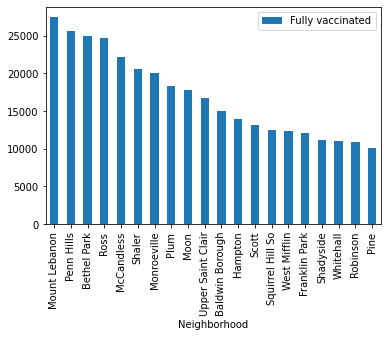

In [6]:
df.nlargest(20,'Fully vaccinated').plot(x='Neighborhood',y='Fully vaccinated',kind="bar")

## Jobs Availability Dataset

The dataset available at the link https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6 contains information about neighborhoods in Pittsburgh, PA, with data related to the Supplemental Nutrition Assistance Program (SNAP), also known as food stamps. SNAP is a federal assistance program that provides nutrition benefits to eligible low-income individuals and families to help them purchase food. This data included information about the jobs availability in the neighborhoods.

##### The metric we chose was the number of jobs availability in the neighborhood so we are going to fix the dataset in a way we could use this metric efficiently

We chose this metric because the availability of jobs in a neighborhood can be a significant factor in determining whether it is a good place to raise a family. It can contribute to economic stability, provide career opportunities, reduce commuting time, promote economic mobility, and contribute to community development, all of which can positively impact the well-being and quality of life for families residing in that neighborhood.

In [7]:
df1 = pd.read_csv("Neighborhoods_with_SNAP_Data.csv")
df1

,FID,Neighborhood_2010_FID_BlockG,Neighborhood_2010_STATEFP10,Neighborhood_2010_COUNTYFP10,Neighborhood_2010_TRACTCE10,Neighborhood_2010_BLKGRPCE10,Neighborhood_2010_GEOID10,Neighborhood_2010_NAMELSAD10,Neighborhood_2010_MTFCC10,Neighborhood_2010_FUNCSTAT10,...,SNAP_All_csv_Commute_to_Work__C,SNAP_All_csv_Commute_to_Work__P,SNAP_All_csv_Commute_to_Work__T,SNAP_All_csv_Commute_to_Work__M,SNAP_All_csv_Commute_to_Work__B,SNAP_All_csv_Commute_to_Work__W,SNAP_All_csv_Commute_to_Work__O,SNAP_All_csv_Work_at_Home__2010,SHAPE_Length,SHAPE_Area
0,1,0,42,3,40500,1,420030405001,Block Group 1,G5030,S,...,6.9%,13.3%,0.0%,0.0%,0.0%,62.4%,0.0%,1.2%,11525.904546,7.842997e+06
1,2,1,42,3,40400,1,420030404001,Block Group 1,G5030,S,...,7.2%,11.5%,0.4%,0.0%,2.9%,52.6%,0.4%,4.4%,20945.562570,1.390469e+07
2,3,2,42,3,40200,2,420030402002,Block Group 2,G5030,S,...,1.0%,22.1%,0.0%,0.0%,0.0%,40.8%,0.7%,0.0%,18280.484515,5.998649e+06
3,4,3,42,3,30500,2,420030305002,Block Group 2,G5030,S,...,9.6%,16.5%,2.0%,0.0%,0.0%,6.5%,0.0%,0.0%,15694.771444,7.203631e+06
4,5,5,42,3,20300,1,420030203001,Block Group 1,G5030,S,...,19.1%,18.1%,0.0%,0.0%,0.0%,0.0%,0.0%,9.0%,24019.532672,1.694875e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,265,42,3,563000,4,420035630004,Block Group 4,G5030,S,...,7.9%,14.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,9978.225999,3.683820e+06
86,87,298,42,3,563100,3,420035631003,Block Group 3,G5030,S,...,4.7%,0.0%,0.0%,0.0%,0.0%,14.9%,0.0%,0.0%,16308.779881,1.024662e+07
87,88,32,42,3,562600,1,420035626001,Block Group 1,G5030,S,...,17.2%,15.6%,0.0%,18.8%,0.0%,0.0%,0.0%,0.0%,18778.991513,5.579476e+06
88,89,57,42,3,250700,1,420032507001,Block Group 1,G5030,S,...,0.0%,41.0%,0.0%,0.0%,0.0%,13.7%,0.0%,0.0%,11709.518764,6.050817e+06


#### Choosing the metrics we want and renaming them to look better
The dataset has many columns so we picked the only ones we need and renamed them to much more appropriate names

In [8]:
df1 = df1[['SNAP_All_csv_Neighborhood','Total___Jobs_Located_in_N_hood_']]
df1 = df1.rename(columns={"SNAP_All_csv_Neighborhood": "Neighborhood","Total___Jobs_Located_in_N_hood_": "Jobs located in the neighborhood"})
df1.head(10)


,Neighborhood,Jobs located in the neighborhood
0,Central Oakland,3862
1,North Oakland,18174
2,West Oakland,12895
3,Crawford-Roberts,884
4,Strip District,11228
5,Central Business District,95545
6,Spring Hill-City View,270
7,Perry South,987
8,Summer Hill,157
9,Northview Heights,210


#### Show top 20 neighborhoods based on Jobs Availablity 

In [9]:
df1.nlargest(20,'Jobs located in the neighborhood')

,Neighborhood,Jobs located in the neighborhood
5,Central Business District,95545
1,North Oakland,18174
2,West Oakland,12895
4,Strip District,11228
14,South Side Flats,10170
57,Shadyside,9027
17,Bluff,8800
65,Squirrel Hill North,8671
63,Chateau,6870
32,Bloomfield,6799


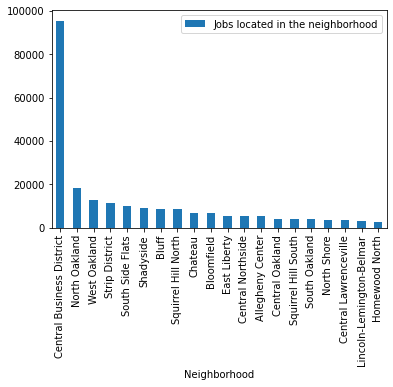

In [10]:
df1.nlargest(20,'Jobs located in the neighborhood').plot(x='Neighborhood',y='Jobs located in the neighborhood',kind="bar")

## College Enrollment Dataset

The dataset available at https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-school-enrollment/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f contains information related to school enrollment in Pittsburgh, Pennsylvania, based on the 2015 American Community Survey. The dataset provides data on the enrollment status of individuals, including children and adults, in various types of schools, such as public schools, private schools, and colleges/universities.

##### The metric we chose was the number of enrolled undergraduate and graduate students so we are going to fix the dataset in a way we could use this metric efficiently

We chose this metric because the presence of undergraduate and graduate students in a neighborhood can bring about various positive impacts, including access to educational opportunities, cultural diversity, services and amenities, economic opportunities, and a sense of community. These factors can contribute to a favorable environment for raising a family, providing opportunities for learning, growth, and engagement within the neighborhood.

In [11]:
df2 = pd.read_csv("school enrollment neighborhood.csv")
df2

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,2662.0,391.154701,625.0,206.211057,82.0,69.455021,18.0,32.264532,...,52.0,45.705580,45.0,46.346521,85.0,53.497664,98.0,57.913729,2037.0,274.100347
87,West End,88,235.0,138.000000,71.0,60.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,71.0,60.000000,0.0,10.000000,164.0,101.000000
88,West Oakland,89,1681.0,280.850494,791.0,229.002183,17.0,20.591260,0.0,14.142136,...,3.0,11.180340,13.0,23.259407,508.0,211.123187,148.0,69.634761,890.0,149.241415
89,Westwood,90,3303.0,370.276923,629.0,189.200951,75.0,56.044625,65.0,61.619802,...,33.0,24.596748,0.0,14.142136,178.0,77.781746,13.0,20.591260,2674.0,256.095685


#### Choosing the metrics we want and creating a new column
This is intended to combine the undergraduate and graduate students' columns into one

In [12]:
df2 = df2[['Neighborhood','Estimate; Enrolled in school: - Enrolled in college, undergraduate years','Estimate; Enrolled in school: - Graduate or professional school']]
df2['Enrolled in undergraduate or graduate school']= ""

<ipython-input-12-4ea3165a6d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Enrolled in undergraduate or graduate school']= ""


#### Combining those Graduate and Undergraduate students in one column
We iterated through all the rows to add all the graduate and undergraduate students together and added them to the new column "Enrolled in undergraduate or graduate school"

In [13]:
for index, row in df2.iterrows():
    enrolled = row['Estimate; Enrolled in school: - Enrolled in college, undergraduate years']+row['Estimate; Enrolled in school: - Graduate or professional school']
    df2.at[index,'Enrolled in undergraduate or graduate school']=enrolled

df2 = df2.drop(columns=['Estimate; Enrolled in school: - Enrolled in college, undergraduate years','Estimate; Enrolled in school: - Graduate or professional school'])
df2['Enrolled in undergraduate or graduate school'] = df2['Enrolled in undergraduate or graduate school'].astype(int)
df2.head(5)

,Neighborhood,Enrolled in undergraduate or graduate school
0,Allegheny Center,201
1,Allegheny West,27
2,Allentown,199
3,Arlington,158
4,Arlington Heights,12


#### Show top 20 Neighborhoods based on college enrollment

In [14]:
df2.nlargest(20,'Enrolled in undergraduate or graduate school')

,Neighborhood,Enrolled in undergraduate or graduate school
56,North Oakland,6983
76,Squirrel Hill North,4685
19,Central Oakland,4613
68,Shadyside,4167
10,Bluff,3537
77,Squirrel Hill South,2499
72,South Side Flats,1850
9,Bloomfield,1676
16,Central Business District,1616
70,South Oakland,1381


#### Show top 20 Neighborhoods based on college enrollment as a plot

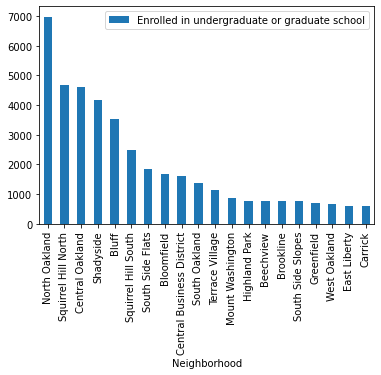

In [15]:
df2.nlargest(20,'Enrolled in undergraduate or graduate school').plot(x='Neighborhood',y='Enrolled in undergraduate or graduate school',kind="bar")

## Crime Rate Dataset

The crime rate dataset available at https://data.wprdc.org/dataset/pittsburgh-neighborhood-atlas-1977 provides information on crime statistics in Pittsburgh, Pennsylvania. It includes data on different types of crimes, their location, and frequency of incidents reported in the city over a period of time. This dataset can be useful for understanding crime trends and patterns in different neighborhoods of Pittsburgh and evaluating the safety and security of each neighborhood. It can be valuable for researchers, policymakers, and residents interested in assessing crime rates as a factor in choosing the best neighborhood for their families in Pittsburgh.

##### The metric we chose was crime rate so we are going to fix the dataset in a way we could use this metric efficiently

We chose this metric because a low crime rate in a neighborhood is important for families as it provides a safer environment, peace of mind, positive impacts on children, higher quality of life, and long-term investment benefits. It is a crucial factor to consider when choosing a neighborhood to raise a family.

##### In this dataset, "Central Business District" was named "Downtown." So we modified it

In [16]:
d1 = pd.read_csv("Crime rate.csv")
d1.at[18,"neighborhood"] = "Central Business District"
d1

,neighborhood,number_major_crimes_1975,neighborhood_crime_rate_1975
0,Westwood,78,0.023
1,31st ward,92,0.013
2,Arlington,184,0.028
3,Allegheny Center,571,0.312
4,Allegheny West,227,0.217
...,...,...,...
64,Swisshelm Heights,16,0.008
65,Troy Hill,61,0.016
66,Uptown,409,0.126
67,West End,60,0.040


#### We chose our metric and made the crime rate look like an actual percentage
We iterated through all the rows to edit the crime rate number into a percentage

In [17]:
d1 = d1[["neighborhood","neighborhood_crime_rate_1975"]]
d1 = d1.rename(columns={"neighborhood_crime_rate_1975":"Crime Rate %","neighborhood":"Neighborhood"})
for index, row in d1.iterrows():
    percentage = row["Crime Rate %"]
    percentage = percentage * 100
    percentage = round(percentage,2)
    d1.at[index,"Crime Rate %"] = percentage


d1

,Neighborhood,Crime Rate %
0,Westwood,2.3
1,31st ward,1.3
2,Arlington,2.8
3,Allegheny Center,31.2
4,Allegheny West,21.7
...,...,...
64,Swisshelm Heights,0.8
65,Troy Hill,1.6
66,Uptown,12.6
67,West End,4.0


#### Show the 20 Neighborhoods with the least crime rate

In [18]:
d1.nsmallest(20,"Crime Rate %")

,Neighborhood,Crime Rate %
31,Glen Hazel Heights,0.0
64,Swisshelm Heights,0.8
35,Ivory Avenue District,1.0
17,Crafton Heights,1.2
50,Oakwood,1.2
1,31st ward,1.3
11,Brighton Heights,1.5
59,Spring Hill,1.5
12,Brookline,1.6
51,Overbrook,1.6


#### Show the 20 Neighborhoods with the least crime rate as a plot

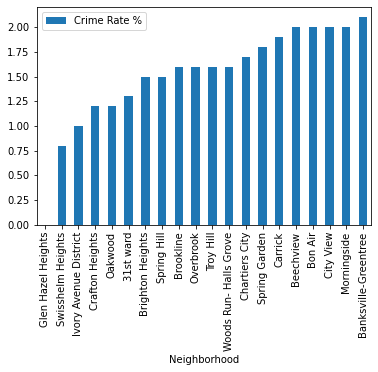

In [19]:
d1.nsmallest(20,"Crime Rate %").plot(x="Neighborhood", y ="Crime Rate %", kind = "bar")

## Family Households Dataset

The dataset available at https://data.wprdc.org/dataset/pittsburgh-american-community-survey-data-household-types/resource/74deca7d-b398-4137-83d7-553a7162f464 is based on the American Community Survey (ACS) data for Pittsburgh, Pennsylvania. The dataset provides information on various household types in the city, including details such as the number of households, family households, non-family households, and other household types. It may also include data on factors such as household size, marital status, presence of children, and housing units. This dataset can be used to gain insights into the composition and characteristics of households in Pittsburgh, which can be valuable for understanding the demographics and family dynamics of different neighborhoods. Researchers, policymakers, and residents interested in understanding household types and their distribution in Pittsburgh can benefit from this dataset for various purposes, such as community planning, policy development, and decision-making.

##### The metric we chose was family households in the neighborhood so we are going to fix the dataset in a way we could use this metric efficiently

We chose this metric because, the number of family households in a neighborhood can contribute to a supportive and family-friendly environment for raising children, providing opportunities for socialization, access to amenities and resources, and a sense of community. It is an important factor to consider when evaluating the suitability of a neighborhood for families.

In [20]:
d2 = pd.read_csv("Households neighborhoods.csv")
d2

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Family households:,Margin of Error; Family households:,Estimate; Family households: - Married-couple family,Margin of Error; Family households: - Married-couple family,Estimate; Family households: - Other family:,Margin of Error; Family households: - Other family:,Estimate; Family households: - Other family: - Male householder,Margin of Error; Family households: - Other family: - Male hous,Estimate; Family households: - Other family: - Female household,Margin of Error; Family households: - Other family: - Female ho,Estimate; Nonfamily households:,Margin of Error; Nonfamily households:,Estimate; Nonfamily households: - Householder living alone,Margin of Error; Nonfamily households: - Householder living alo,Estimate; Nonfamily households: - Householder not living alone,Margin of Error; Nonfamily households: - Householder not living
0,Allegheny Center,1,870.0,93.000000,184.0,59.000000,128.0,51.000000,56.0,35.000000,0.0,10.000000,56.0,35.000000,686.0,79.000000,529.0,81.000000,157.0,53.000000
1,Allegheny West,2,146.0,36.000000,70.0,32.000000,66.0,32.000000,4.0,7.000000,4.0,7.000000,0.0,10.000000,76.0,29.000000,61.0,25.000000,15.0,15.000000
2,Allentown,3,1069.0,132.457540,622.0,130.234404,175.0,63.584589,447.0,134.718224,16.0,23.685439,431.0,133.360414,447.0,106.386089,383.0,101.710373,64.0,50.249378
3,Arlington,4,701.0,104.465305,394.0,78.319857,230.0,59.514704,164.0,61.302528,44.0,31.764760,120.0,54.726593,307.0,78.568442,180.0,56.151581,127.0,55.668663
4,Arlington Heights,5,144.0,59.000000,86.0,62.000000,0.0,10.000000,86.0,62.000000,0.0,10.000000,86.0,62.000000,58.0,33.000000,58.0,33.000000,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,1287.0,137.091211,543.0,114.376571,334.0,99.644368,209.0,79.636675,90.0,53.600373,119.0,60.613530,744.0,142.147810,515.0,117.209215,229.0,101.444566
87,West End,88,99.0,47.000000,28.0,20.000000,19.0,16.000000,9.0,16.000000,0.0,10.000000,9.0,16.000000,71.0,44.000000,39.0,27.000000,32.0,43.000000
88,West Oakland,89,630.0,79.611557,261.0,60.901560,34.0,23.430749,227.0,56.435804,16.0,19.723083,211.0,55.569776,369.0,69.115845,261.0,66.211781,108.0,46.400431
89,Westwood,90,1492.0,112.538882,896.0,113.718952,673.0,115.663304,223.0,61.294372,70.0,38.483763,153.0,57.245087,596.0,111.731822,526.0,113.863954,70.0,40.496913


#### Choosing the columns with the metrics we want, and remodifing the way data looks to be more presentable
The dataset has many columns so we picked the only ones we need and renamed them to much more appropriate names. 

We iterated through all the rows to calculate the percentage of the family households by dividing "family households" by "the total number of households" to make it look more presentable.

In [21]:
d2 = d2[["Neighborhood","Estimate; Family households:","Estimate; Nonfamily households:"]]
d2["Family households %"] = ""
for index, row in d2.iterrows():
    total = row["Estimate; Nonfamily households:"]+row["Estimate; Family households:"]
    families = row["Estimate; Family households:"]
    percentage1 = round((families/total*100),2)
    d2.at[index,'Family households %'] = percentage1

d2 = d2.drop(columns = ["Estimate; Family households:","Estimate; Nonfamily households:"])
d2["Family households %"] = d2["Family households %"].astype(float)
d2

<ipython-input-21-7e4950e9e7c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["Family households %"] = ""


,Neighborhood,Family households %
0,Allegheny Center,21.15
1,Allegheny West,47.95
2,Allentown,58.19
3,Arlington,56.21
4,Arlington Heights,59.72
...,...,...
86,Upper Lawrenceville,42.19
87,West End,28.28
88,West Oakland,41.43
89,Westwood,60.05


#### Show top 20 Neighborhoods with the most family households

In [22]:
d2.nlargest(20,"Family households %")

,Neighborhood,Family households %
55,New Homestead,71.50
40,Homewood North,70.66
58,Northview Heights,69.41
11,Bon Air,69.09
43,Knoxville,65.23
45,Lincoln Place,65.21
82,Swisshelm Park,65.16
69,Sheraden,64.35
63,Point Breeze,64.05
32,Fineview,63.46


#### Show top 20 Neighborhoods with the most family households as a plot

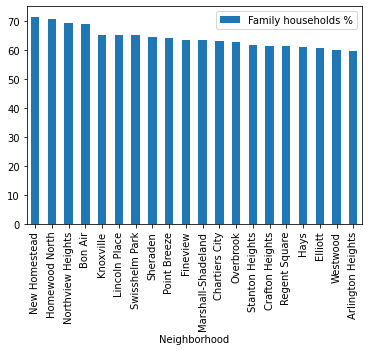

In [23]:
d2.nlargest(20,"Family households %").plot(x="Neighborhood", y ="Family households %", kind = "bar")

## Checking occurance of neighborhoods in all metrics' datasets that contains the top 30
We are going to use dictionaries to determine which neighborhood occurs in the top 30 neighborhood for each metric/dataset

#### Checking Top 30 in School Enrollment Dataset

In [24]:
count = dict()

for index, row in df2.nlargest(30,'Enrolled in undergraduate or graduate school').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1


#### Checking Top 30 in Jobs Availablity Dataset

In [25]:
for index, row in df1.nlargest(30,'Jobs located in the neighborhood').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Checking Top 30 in Covid Vaccination Dataset

In [26]:
for index, row in df.nlargest(30,'Fully vaccinated').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Checking Top 30 in Crime Rate Dataset

In [27]:
for index, row in d1.nsmallest(30,'Crime Rate %').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Checking Top 30 in Family Households Dataset

In [28]:
for index, row in d2.nlargest(30,'Family households %').iterrows():
    neighborhood = row['Neighborhood']
    if neighborhood in count:
        count[neighborhood] = count[neighborhood] + 1
    else:
        count[neighborhood] = 1

#### Sort the top five neighborhoods based on their occurance in the top lists

In [29]:
sorted(count.items(), key = lambda x:x[1], reverse = True)[:5]


[('Brookline', 5),
 ('Carrick', 4),
 ('Shadyside', 3),
 ('Beechview', 3),
 ('Greenfield', 3)]

## Brookline is the Winner!!!

In conclusion, based on the metrics of crime rate, COVID vaccination, number of family households, jobs availability, and number of college enrollment, Brookline emerges as a strong contender for the title of the "Best neighborhood in Pittsburgh for a family."

Firstly, Brookline boasts a relatively low crime rate compared to other neighborhoods in Pittsburgh, making it a safe and secure place for families. Additionally, the neighborhood has a high rate of COVID vaccination, indicating a strong commitment to public health and safety, which is particularly important for families with vulnerable members, such as young children or elderly relatives.

Furthermore, Brookline has many family households, suggesting a family-friendly environment with a sense of community. The availability of jobs in the neighborhood provides employment opportunities for family members, contributing to economic stability and mobility. Moreover, the number of college enrollments in the area indicates access to educational opportunities, which can benefit families with school-age children.

In summary, Brookline stands out as a neighborhood that offers a favorable combination of a low crime rate, a high COVID vaccination rate, a significant number of family households, job availability, and educational opportunities. These factors make it a compelling choice as the "Best neighborhood in Pittsburgh for a family" based on the selected metrics. Families considering a place to settle down in Pittsburgh may find Brookline an attractive option that prioritizes safety, community, employment opportunities, and access to education, all of which are crucial factors for families looking for an ideal place to call home.


# Personal Conclusions

### Abdulrahman's Conclusion

In conclusion, Brookline emerges as a strong contender for the title of the "Best neighborhood in Pittsburgh for a family" based on the metrics of crime rate, COVID vaccination, number of family households, jobs availability, and number of college enrollment. Additionally, as my personal favorite neighborhood, Brookline holds a special place in my heart for its family-friendly environment, sense of community, and access to various amenities. With its low crime rate, high vaccination rate, ample family households, job opportunities, and educational access, Brookline offers a desirable location for families looking to settle down in Pittsburgh. As a resident, I have experienced firsthand the warmth and inclusivity of the community, making it a place where families can thrive and create lasting memories. Based on both objective metrics and my personal preference, I believe that Brookline is the "Best neighborhood in Pittsburgh for a family."

### Shihab's Conclusion

One of the defining features of Brookline is its close-knit community, with many residents actively involved in local events and organizations. Brookline is more laid-back and family-friendly than the South Side Flats, which is my favorite neighborhood. While Brookline  may not have the same bustling nightlife or diverse restaurant scene, it offers a more peaceful and community-oriented atmosphere. Additionally, Brookline is farther from downtown Pittsburgh, which may be a consideration for those who must commute to work or other parts of the city. While it may offer a different vibe than the South Side Flats, it has unique charms and attractions that make it a desirable place to live for many people, and it would be the best neighborhood for a family.